In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['science'])
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['lines.linewidth'] = 2.2

In [3]:
df_results_elder = pd.read_csv("../info.csv")
df_results_deq = pd.read_csv("../deq.csv")

/tmp/ipykernel_757751/3127173880.py:11: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=0, color='r', linestyle='--')


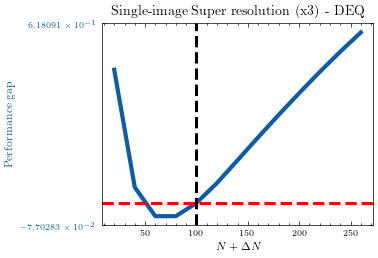

In [4]:
def plot_deq_results(ax):
    accuracies = df_results_deq['final_psnr'].values
    n_iters = df_results_deq['max_iter'].values
    n_iters = np.array([int(n) for n in n_iters])
    accuracy_at_100 = accuracies[n_iters == 100]
    accuracies = accuracy_at_100 - accuracies
    ax.plot(n_iters, accuracies, '-', color='C0', linewidth=3)
    ax.axvline(x=100, color='k', linestyle='--')
    ax.set_yscale('symlog')
    # ax.axhline(y=-accuracy_at_100, color='r', linestyle='--')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(r"$N + \Delta N$")
    # ax.set_ylabel(r"$D(N, \Delta N)$")
    ax.set_ylabel(r"Performance gap")
    ax.yaxis.label.set_color('C0')
    ax.tick_params(axis='y', colors='C0')
    ax.set_title('Single-image Super resolution (x3) - DEQ')
    



plot_deq_results(plt.figure().add_subplot(111))

/tmp/ipykernel_757751/1455544777.py:11: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=0, color='r', linestyle='--')


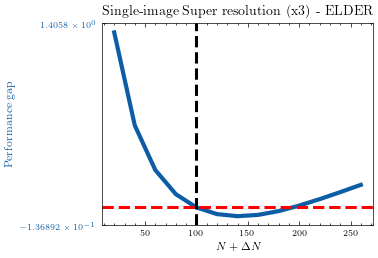

In [5]:
def plot_elder_results(ax):
    accuracies = df_results_elder['final_psnr'].values
    n_iters = df_results_elder['max_iter'].values
    n_iters = np.array([int(n) for n in n_iters])
    accuracy_at_100 = accuracies[n_iters == 100]
    accuracies = accuracy_at_100 - accuracies
    ax.plot(n_iters, accuracies, '-', color='C0', linewidth=3)
    ax.axvline(x=100, color='k', linestyle='--')
    ax.set_yscale('symlog')
    # ax.axhline(y=-accuracy_at_100, color='r', linestyle='--')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(r"$N + \Delta N$")
    # ax.set_ylabel(r"$D(N, \Delta N)$")
    ax.set_ylabel(r"Performance gap")
    ax.yaxis.label.set_color('C0')
    ax.tick_params(axis='y', colors='C0')
    ax.set_title('Single-image Super resolution (x3) - ELDER')
    



plot_elder_results(plt.figure().add_subplot(111))

/tmp/ipykernel_757751/3127173880.py:11: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=0, color='r', linestyle='--')


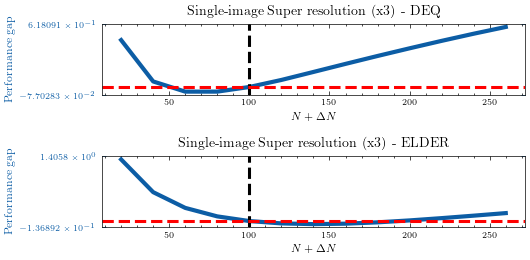

In [6]:
#General figure
# This figure is basically a single figure with all the plots above
# It is useful for the paper
fig, axs = plt.subplots(2, 1, figsize=(5.5, 2.8))
plot_deq_results(axs[0])
plot_elder_results(axs[1])
plt.tight_layout()
plt.savefig('relative_error_vs_n_iters_elder.pdf', bbox_inches='tight', pad_inches=0, dpi=300)